In [ ]:
#importing necessary libraries 
import pandas as pd
import nltk
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim.parsing.preprocessing import STOPWORDS
import numpy as np
import pickle
nltk.download('stopwords')
nltk.download('wordnet')
from typing import List, Dict, Tuple, Set
import itertools
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pickle
import requests
import json
import urllib.request
import time
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
import re
from sklearn.metrics.pairwise import cosine_similarity
import statistics
from datetime import datetime
from scipy.stats import skew
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading dataset

In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
train_eclipse_df=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Siamese/Eclipse_siamese_train_preprocessed.csv')
train_eclipse_df


,Unnamed: 0,description1,description2,is_similar
0,0,investigate changes required for jep maco...,older api has limitations that require ugl...,0
1,2,oshi allows to access hard disk info let s ...,created attachment screenshot set maco...,0
2,3,details of this problem have been discussed ...,originally from method signature selectio...,1
3,4,created attachment example hello can you...,partontopmanager uses eventtopic instead of...,0
4,5,rename module path container from module so...,created attachment workspace log i have a...,0
...,...,...,...,...
34490,36402,if a miner fails for some reason now it is ...,i install oprofile plugin of eclipse on linu...,0
34491,36403,created attachment unsolved imports upgr...,expected result record r implements i but ...,0
34492,36404,in the coming days weeks we will migrate the...,consider the following code public sealed c...,0
34493,36405,the view model editor should provide proper ...,terminate all does only terminate one proc...,0


In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
test_eclipse_df=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Siamese/Eclipse_siamese_test_preprocessed.csv')
test_eclipse_df

,Unnamed: 0,description1,description2,is_similar
0,0,the new meta model is adapted for new coming...,created attachment azure vm agents config ...,0
1,1,as of now when a language server starts the...,bug comment by robart is spam please de...,0
2,2,i found an important bug regarding marketpla...,in stylemanager remove the restriction that...,0
3,3,the method generatorconfigurationoperations ...,seems like babel doesn t provide translation...,0
4,4,the current query test framework is incapabl...,in ticket the generic rule was changed to...,0
...,...,...,...,...
8843,9465,created attachment screenshot bug imple...,the git statistics property page should not ...,0
8844,9466,using eclipse build id the com...,a tree column created with swt center styl...,0
8845,9467,see for example tycho build console ...,when deploying an application and changing i...,0
8846,9468,add support to change background foregroun...,most packages are named eclipse ide for ...,0


In [ ]:
#Merge train & test
frames = [train_eclipse_df, test_eclipse_df]
result = pd.concat(frames)
result = result.sample(frac=1, random_state=1).reset_index(drop=True)
result1 = result.copy()
dup_df= result.copy()
dup_df

,Unnamed: 0,description1,description2,is_similar
0,1954,in bug we discovered that pde does not sup...,in current version this causes orbit reci...,0
1,34311,i need a mentor please eclipse swtchar...,hello checking out the basyx repository vi...,0
2,13017,some advices require additional inputs e g ...,created attachment ada source code and exe...,0
3,10131,created attachment workspace log file ste...,steps to reproduce run the sample applicat...,0
4,27543,textdocument definition request is expecte...,denis we should upgrade to the new version ...,0
...,...,...,...,...
43338,8241,after bug it seems unnecessary to listen t...,the jsonforms export should support the expo...,0
43339,34307,the data provider documentation is incomplet...,hello webmaster please delete branch jona...,0
43340,5478,it is not uncommon to use multiple levels of...,the label restore from local history is...,0
43341,12835,the registered downloads are filtered by pla...,use case user wants to download an eclipse ...,0


In [ ]:
FEATURES = ['description1', 'description2']
print('Description of length of the feature columns')
dup_df[FEATURES].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,description1,description2
count,43343.000000,43343.000000
mean,859.045498,914.414969
std,2150.363951,2395.067752
min,50.000000,50.000000
25%,185.000000,188.000000
50%,359.000000,371.000000
75%,740.000000,782.000000
max,94030.000000,94030.000000


## Train, Validation, Test Split

In [ ]:
from sklearn.model_selection import train_test_split
import random
import sklearn

In [ ]:
train_val_df = train_eclipse_df.copy()
train_val_df

,Unnamed: 0,description1,description2,is_similar
0,0,investigate changes required for jep maco...,older api has limitations that require ugl...,0
1,2,oshi allows to access hard disk info let s ...,created attachment screenshot set maco...,0
2,3,details of this problem have been discussed ...,originally from method signature selectio...,1
3,4,created attachment example hello can you...,partontopmanager uses eventtopic instead of...,0
4,5,rename module path container from module so...,created attachment workspace log i have a...,0
...,...,...,...,...
34490,36402,if a miner fails for some reason now it is ...,i install oprofile plugin of eclipse on linu...,0
34491,36403,created attachment unsolved imports upgr...,expected result record r implements i but ...,0
34492,36404,in the coming days weeks we will migrate the...,consider the following code public sealed c...,0
34493,36405,the view model editor should provide proper ...,terminate all does only terminate one proc...,0


In [ ]:
 test_df = test_eclipse_df.copy()
 test_df

,Unnamed: 0,description1,description2,is_similar
0,0,the new meta model is adapted for new coming...,created attachment azure vm agents config ...,0
1,1,as of now when a language server starts the...,bug comment by robart is spam please de...,0
2,2,i found an important bug regarding marketpla...,in stylemanager remove the restriction that...,0
3,3,the method generatorconfigurationoperations ...,seems like babel doesn t provide translation...,0
4,4,the current query test framework is incapabl...,in ticket the generic rule was changed to...,0
...,...,...,...,...
8843,9465,created attachment screenshot bug imple...,the git statistics property page should not ...,0
8844,9466,using eclipse build id the com...,a tree column created with swt center styl...,0
8845,9467,see for example tycho build console ...,when deploying an application and changing i...,0
8846,9468,add support to change background foregroun...,most packages are named eclipse ide for ...,0


In [ ]:
train_df, val_df = train_test_split(
  train_val_df,
  test_size=0.2,
  stratify=train_val_df.is_similar,
  random_state=13,
)

In [ ]:
train_df

,Unnamed: 0,description1,description2,is_similar
33970,35858,a number of times today i attempted to push ...,signing service is down as can be seen at ...,0
22051,23259,the download location for the three ecli...,when trying to open the target platfrom pref...,0
27042,28531,on windows korean locale the defaultwebbr...,for the following code see outline view ...,0
31184,32901,here is a convoluted issue when trying to bu...,we have various compiler warnings in e g ...,0
13394,14101,ei creation inside interface in idb cdb diag...,since yesterday the workspace has build pa...,0
...,...,...,...,...
20006,21103,this bug is for the following commit xy g...,hello team we would like to configure the ...,0
27573,29095,the message err too many redirects is alread...,some tests are failing due to diagram openin...,0
3635,3837,to track issues for the capella modes states...,currently openmdm uses to quote strings ...,0
17642,18612,fix a problem in run task phase chart gener...,the following features show up in the build ...,0


In [ ]:
val_df

,Unnamed: 0,description1,description2,is_similar
5313,5607,currently lists this build queue eclipse...,no gerrit build have run since saturday fe...,1
14288,15052,steps to reproduce start latest eclipse ...,hello could you possibly remove my url ...,0
9865,10414,adapterfactorylabelprovider implements addli...,forte should be able to handle some basic ro...,0
25070,26445,created attachment click on subscribe i...,java lang throwable at org eclipse swt br...,0
5805,6126,if a lifeline contains a destructionoccurren...,open a debug view like register or memory p...,0
...,...,...,...,...
6516,6889,rename of display view not done in h...,currently for convinience the fbnetworkimpor...,0
22463,23705,instanceofexpression clone throws a npe whe...,as a birt committer i am able to create dis...,0
1741,1843,currently the elements in goto for a valid...,created attachment screenshot it seems th...,0
30343,32017,properties of elements which can not be edit...,i m experiencing the following problems afte...,0


In [ ]:
print(f'Train Val Test Size: {len(train_df):,} {len(val_df):,} {len(test_df):,}')

Train Val Test Size: 27,596 6,899 8,848


## Download & Prepare Embedding

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import tensorflow as tf
import tensorflow.keras.utils as kutils
from keras.layers.preprocessing.text_vectorization import TextVectorization

In [ ]:
pip install kutils==0.3.0

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import tensorflow as tf
import tensorflow.keras.utils as kutils
from keras.layers.preprocessing.text_vectorization import TextVectorization

In [ ]:
from pathlib import Path
Path('C:\Program Files').parent

PosixPath('.')

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-03-16 01:32:38--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-03-16 01:32:38--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-03-16 01:32:38--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove*.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
!ls
!pwd

drive		   glove.6B.200d.txt  glove.6B.50d.txt	sample_data
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
/content


In [ ]:
import numpy as np
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [ ]:
!pip install --upgrade pip
!pip install -U -q pydrive
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null

!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive

     |████████████████████████████████| 2.1 MB 8.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
·····

In [ ]:
import pickle
pickle.dump({'embeddings_index' : embeddings_index } , open('drive/MyDrive/Project 6308 + ICSME/Siamese/glove.42B.300d.txt', 'wb'))

In [ ]:
file_path = open('drive/MyDrive/Project 6308 + ICSME/Siamese/glove.42B.300d.txt',  mode="r", encoding="utf-8")

In [ ]:
from io import open

In [ ]:
def ensure_glove_embedding(verbose=False):
  import pathlib
  # If this operation fails, print the parent-dir
  # go there, and extract the file




def load_glove(path, words=None):
    word_to_embedding = {open('drive/MyDrive/Project 6308 + ICSME/Siamese/glove.42B.300d.txt',  mode="r", encoding="utf-8")}

    with iopen(path, 'r') as stream:
        for n, line in enumerate(stream):
            if not isinstance(line, str):
                line = line.decode('utf-8')
            split_line = line.split(' ')
            word = split_line[0]

            if words is None or word in words:
                try:
                    word_to_embedding[word] = [float(f) for f in split_line[1:]]
                except ValueError:
                    logger.error('{}\t{}\t{}'.format(n, word, str(split_line)))

    return word_to_embedding 

glove_file_path = ensure_glove_embedding(verbose=True)

In [ ]:


import numpy as np
print('Indexing word vectors.')

embedding_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embedding_index))


Indexing word vectors.
Found 400000 word vectors.


## create vocabulary index

In [ ]:
from typing import List

In [ ]:
MAX_TOKENS = 20000
MAX_TITLE_LENGTH = 21
MAX_DESCRIPTION_LENGTH = 300
EMBEDDING_DIM = 100

In [ ]:
def build_vocab(sentences: List[str], sequence_length: int):
  vectorizer = TextVectorization(
    max_tokens=MAX_TOKENS - 2,
    output_sequence_length=sequence_length,
  )
  vectorizer.adapt(sentences)
  vocab = vectorizer.get_vocabulary()
  word_index = dict(zip(vocab, range(len(vocab))))

  return vectorizer, word_index

In [ ]:
dup_df

,Unnamed: 0,description1,description2,is_similar
0,1954,in bug we discovered that pde does not sup...,in current version this causes orbit reci...,0
1,34311,i need a mentor please eclipse swtchar...,hello checking out the basyx repository vi...,0
2,13017,some advices require additional inputs e g ...,created attachment ada source code and exe...,0
3,10131,created attachment workspace log file ste...,steps to reproduce run the sample applicat...,0
4,27543,textdocument definition request is expecte...,denis we should upgrade to the new version ...,0
...,...,...,...,...
43338,8241,after bug it seems unnecessary to listen t...,the jsonforms export should support the expo...,0
43339,34307,the data provider documentation is incomplet...,hello webmaster please delete branch jona...,0
43340,5478,it is not uncommon to use multiple levels of...,the label restore from local history is...,0
43341,12835,the registered downloads are filtered by pla...,use case user wants to download an eclipse ...,0


In [ ]:
descr_vectorizer, descr_word_index = build_vocab(
  [dup_df.description1, dup_df.description2],
  MAX_DESCRIPTION_LENGTH,
)

print(
  'Most frequent description words:',
  list(itertools.islice(descr_word_index.keys(), 5)),
)

Most frequent description words: ['', '[UNK]', 'eclipse', 'org', 'at']


## Create Embedding Matrix

In [ ]:
def create_embedding_matrix(
  embeddings_index: Dict[str, np.ndarray],
  word_index: Dict[str, int],
  verbose=False,
):
  hits = 0
  misses = 0

  # prepare embedding matrix
  embedding_matrix = np.zeros((MAX_TOKENS, EMBEDDING_DIM))
  for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      # Words not found in embedding index will be all-zeros.
      # This includes the representation for "padding" and "OOV"
      embedding_matrix[i] = embedding_vector
      hits += 1
    else:
      misses += 1

  if verbose:
    print('Embedding shape:', embedding_matrix.shape)
    print(f'Found {hits} words, missed {misses}.')

  return embedding_matrix

In [ ]:
print('Creating description embedding matrix:')
descr_embedding_matrix = create_embedding_matrix(
  embeddings_index, descr_word_index, True,
)

Creating description embedding matrix:
Embedding shape: (20000, 100)
Found 9220 words, missed 10778.


## Prepare Training Data

In [ ]:
def generate_batches(
  split_df: pd.DataFrame,
  batch_size=1024,
):
  steps_per_epoch = len(split_df) // batch_size
  while True:
    for i in range(steps_per_epoch):
      offset = i * batch_size
      till = offset + batch_size
      feature_batches = []
      for feature in FEATURES:
        vectorizer = title_vectorizer if feature.startswith('title') else descr_vectorizer
        feature_batch = vectorizer(
          split_df[feature][offset: till].to_numpy().reshape((-1, 1))
        ).numpy()
        feature_batches.append(feature_batch)


      target_batch = split_df.is_similar[offset: till].to_numpy()
      yield (
        feature_batches,
        target_batch,
      )

## Create Models

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import callbacks
from keras.initializers.initializers_v2 import Constant

In [ ]:
DescrEmbeddingLayer = layers.Embedding(
  input_dim=MAX_TOKENS,
  output_dim=EMBEDDING_DIM,
  embeddings_initializer=Constant(descr_embedding_matrix),
  trainable=False,
  name='DescrEmbeddingLayer',
)

def make_descr_layer(num, kernel_size=3, pool_size=2, strides=None):
  DescrConv1dLayer = layers.Conv1D(
    filters=32,
    kernel_size=kernel_size,
    activation='relu',
    name=f'DescrConv1dLayer{num}',
  )
  DescrMaxPool1dLayer = layers.MaxPool1D(
    pool_size=pool_size,
    strides=strides,
    name=f'DescrMaxPool1dLayer{num}',
  )
  return DescrConv1dLayer, DescrMaxPool1dLayer

DescrConv1dLayer1, DescrMaxPool1dLayer1 = make_descr_layer(1, pool_size=4)
DescrConv1dLayer2, DescrMaxPool1dLayer2 = make_descr_layer(2)

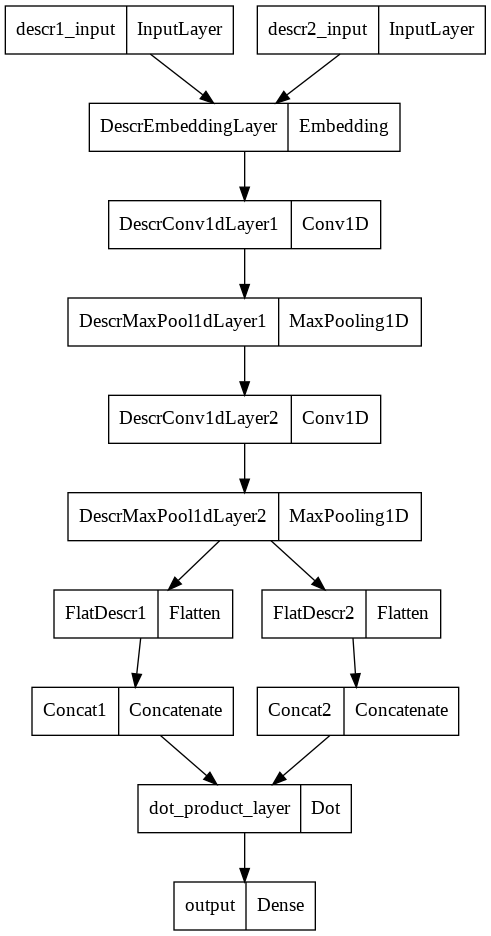

In [ ]:
def create_siamese_component(num: int):
  class SiameseComponent:
    def __init__(self, title: layers.Input, description: layers.Input, output: layers.Concatenate):
      self.title = title
      self.description = description
      self.output = output

  title_input = layers.Input(shape=(None,), dtype='int32', name=f'title{num}_input')

  descr_input = layers.Input(shape=(None,), name=f'descr{num}_input')
  descr_embedding_layer = DescrEmbeddingLayer(descr_input)
  descr_conv1d1 = DescrConv1dLayer1(descr_embedding_layer)
  descr_max_pool1d1 = DescrMaxPool1dLayer1(descr_conv1d1)
  descr_conv1d2 = DescrConv1dLayer2(descr_max_pool1d1)
  descr_max_pool1d2 = DescrMaxPool1dLayer2(descr_conv1d2)
  # descr_conv1d3 = DescrConv1dLayer3(descr_max_pool1d2)
  # descr_max_pool1d3 = DescrMaxPool1dLayer3(descr_conv1d3)
  descr_flat_Layer = layers.Flatten(name=f'FlatDescr{num}')(descr_max_pool1d2)
  
  concat = layers.Concatenate(axis=1, name=f'Concat{num}')([descr_flat_Layer])
  return SiameseComponent(title_input, descr_input, concat)


component1 = create_siamese_component(1)
component2 = create_siamese_component(2)

dot_product_layer = layers.Dot(
  axes=1,
  name='dot_product_layer'
)([component1.output, component2.output])
output = layers.Dense(
  1, activation='sigmoid', name='output',
)(dot_product_layer)
siamese_model = models.Model(
  inputs=[component1.description, component2.description],
  outputs=output,
  name='siamese_model'
)

kutils.plot_model(siamese_model)

## Train

In [ ]:
BATCH_SIZE = 2048

siamese_model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['acc'],
)
callback = callbacks.ModelCheckpoint(
    filepath=f'../../drive/MyDrive/Project 6308 + ICSME/Siamese'
             '.epoch-{epoch:02d}-loss-{val_loss:.3f}.hdf5',
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    mode='min',
)

In [ ]:
history = siamese_model.fit(
  generate_batches(train_df, BATCH_SIZE),
  steps_per_epoch=len(train_df) // BATCH_SIZE,
  epochs=150,
  validation_data=generate_batches(val_df, BATCH_SIZE),
  validation_steps=len(val_df) // BATCH_SIZE,
  verbose=1,
  callbacks= [callback]
)

Epoch 1/150
13/13 [==============================] - 40s 3s/step - loss: 27.5536 - acc: 0.0691 - val_loss: 1.3735 - val_acc: 0.0703
Epoch 2/150
13/13 [==============================] - 37s 3s/step - loss: 0.8895 - acc: 0.2690 - val_loss: 0.7300 - val_acc: 0.5791
Epoch 3/150
13/13 [==============================] - 37s 3s/step - loss: 0.7134 - acc: 0.6851 - val_loss: 0.7014 - val_acc: 0.7559
Epoch 4/150
13/13 [==============================] - 36s 3s/step - loss: 0.6967 - acc: 0.7847 - val_loss: 0.6919 - val_acc: 0.8040
Epoch 5/150
13/13 [==============================] - 37s 3s/step - loss: 0.6890 - acc: 0.8126 - val_loss: 0.6855 - val_acc: 0.8228
Epoch 6/150
13/13 [==============================] - 39s 3s/step - loss: 0.6831 - acc: 0.8277 - val_loss: 0.6800 - val_acc: 0.8368
Epoch 7/150
13/13 [==============================] - 37s 3s/step - loss: 0.6777 - acc: 0.8389 - val_loss: 0.6746 - val_acc: 0.8446
Epoch 8/150
13/13 [==============================] - 37s 3s/step - loss: 0.6724 - 

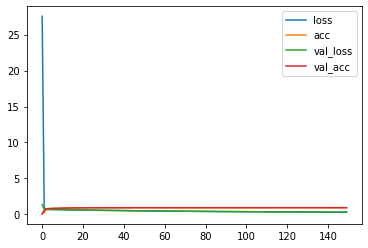

In [ ]:
ax = pd.DataFrame(history.history).plot()

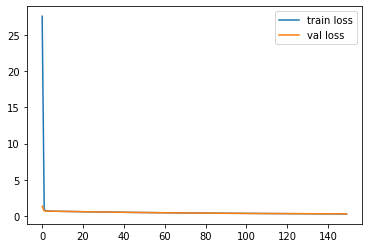

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
plot_model(siamese_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

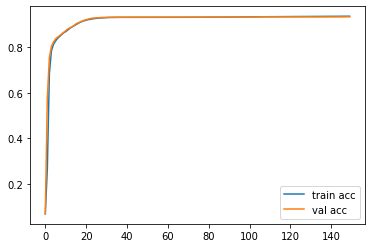

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
from sklearn.metrics import accuracy_score
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Evaluate on test data

In [ ]:
# from tensorflow.keras.models import load_model

# siamese_model = load_model('../../models/siamese-openOffice.epoch-30-loss-0.457.hdf5')

In [ ]:
siamese_model.evaluate(
  generate_batches(test_df, BATCH_SIZE),
  steps=len(test_df) // BATCH_SIZE,
)

4/4 [==============================] - 5s 1s/step - loss: 0.3106 - acc: 0.9323


[0.31063324213027954, 0.9322509765625]

In [ ]:
len(test_df)

8848

In [ ]:
BATCH_SIZE = len(test_df)
num_batched_instances = len(test_df) - (len(test_df) % BATCH_SIZE)
pred_y = siamese_model.predict(
  generate_batches(test_df, BATCH_SIZE),
  steps=len(test_df) // BATCH_SIZE,
  verbose=1,
)

1/1 [==============================] - 6s 6s/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(
  test_df.is_similar[:num_batched_instances],
  pred_y > .5,
))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8203
           1       0.75      0.09      0.16       645

    accuracy                           0.93      8848
   macro avg       0.84      0.54      0.56      8848
weighted avg       0.92      0.93      0.91      8848



In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [ ]:
from sklearn.metrics import roc_curve

value_names = ['TPR', 'FPR', 'Threshold']
roc = dict(zip(value_names, roc_curve(
  test_df.is_similar[:num_batched_instances],
  pred_y,
)))
pd.DataFrame(roc)

,TPR,FPR,Threshold
0,0.000000,0.000000,1.999999
1,0.000000,0.001550,0.999999
2,0.000000,0.012403,0.989657
3,0.000122,0.012403,0.985328
4,0.000122,0.018605,0.982425
...,...,...,...
283,0.116787,0.325581,0.193294
284,0.116787,0.327132,0.193293
285,0.116908,0.327132,0.193293
286,0.117030,0.328682,0.193292


In [ ]:
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score(
  test_df.is_similar[:num_batched_instances],
  pred_y,
)

print('AUROC score:', auroc)

AUROC score: 0.6141093209423287


In [ ]:
print('For probability:')
print(f'Mean: {pred_y.mean()}, STD: {pred_y.std()}')
print('For categorical:')
print(f'Mean: {(pred_y > .5).mean()}, STD: {(pred_y > .5).std()}')

For probability:
Mean: 0.20089329779148102, STD: 0.06073995679616928
For categorical:
Mean: 0.008476491862567812, STD: 0.09167682885152406


## Evaluate on textually similar data

In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
sim_df=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Siamese/Eclipse_siamese_textually_similar_test_duplicates_preprocessed.csv')
sim_df

,Unnamed: 0,description1,description2,is_similar
0,0,installing eclipse via eclipse inst ex...,error present while building maven project w...,0
1,1,when enabling parallel builds warnings are r...,when i try to run my build in parallel using...,1
2,2,if i start my eclipse on i get java lan...,codefragments internal platform java ...,1
3,3,hello i installed the eclipse modeling too...,hello i installed the eclipse modeling too...,1
4,4,open a requirejs module file select one o...,created attachment error screenshot conte...,0
...,...,...,...,...
678,681,configuration details product eclipse...,configuration details product eclipse...,1
679,682,most of the time when i use open type i...,created attachment oomph startup error wh...,0
680,683,eclipse is located under c program files ec...,the fix for bug added quoting around the c...,1
681,684,hello setting background for the items in t...,using swt if you set the background o...,1


In [ ]:
len(sim_df)

683

In [ ]:
BATCH_SIZE = len(sim_df)
num_batched_instances = len(sim_df) - (len(sim_df) % BATCH_SIZE)
pred_y_sim = siamese_model.predict(
  generate_batches(sim_df, BATCH_SIZE),
  steps=len(sim_df) // BATCH_SIZE,
  verbose=1,
)

1/1 [==============================] - 0s 399ms/step


In [ ]:
siamese_model.evaluate(
  generate_batches(sim_df, BATCH_SIZE),
  steps=len(sim_df) // BATCH_SIZE,
)

1/1 [==============================] - 0s 359ms/step - loss: 0.8589 - acc: 0.5534


[0.8588885068893433, 0.5534406900405884]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
  sim_df.is_similar[:num_batched_instances],
  pred_y_sim > .5,
))

              precision    recall  f1-score   support

           0       0.53      0.94      0.68       343
           1       0.74      0.16      0.26       340

    accuracy                           0.55       683
   macro avg       0.64      0.55      0.47       683
weighted avg       0.63      0.55      0.47       683



In [ ]:
from sklearn.metrics import roc_curve

value_names = ['TPR', 'FPR', 'Threshold']
roc = dict(zip(value_names, roc_curve(
  sim_df.is_similar[:num_batched_instances],
  pred_y_sim,
)))
pd.DataFrame(roc)

,TPR,FPR,Threshold
0,0.000000,0.000000,1.999999
1,0.002915,0.002941,0.999999
2,0.005831,0.005882,0.999999
3,0.005831,0.029412,0.989657
4,0.008746,0.029412,0.988792
...,...,...,...
112,0.349854,0.426471,0.193395
113,0.349854,0.429412,0.193360
114,0.361516,0.429412,0.193300
115,0.361516,0.435294,0.193292


In [ ]:
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score(
  sim_df.is_similar[:num_batched_instances],
  pred_y_sim,
)

print('AUROC score:', auroc)


AUROC score: 0.5631238209569542


In [ ]:
print('For probability:')
print(f'Mean: {pred_y_sim.mean()}, STD: {pred_y_sim.std()}')
print('For categorical:')
print(f'Mean: {(pred_y_sim > .5).mean()}, STD: {(pred_y_sim > .5).std()}')

For probability:
Mean: 0.27264460921287537, STD: 0.20016930997371674
For categorical:
Mean: 0.10688140556368961, STD: 0.3089624098631089


## Evaluate on textually dissimilar data

In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
dissim_df=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Siamese/Eclipse_siamese_textually_dissimilar_test_duplicates_preprocessed.csv')
dissim_df

,Unnamed: 0,description1,description2,is_similar
0,0,created attachment example projects to rep...,created attachment picture with tree tree...,0
1,1,following snippet gives a wrong positive in ...,the current null analysis in ecj does not re...,1
2,2,in microsoft visual studio there was a rem...,created attachment patch tested with vs ...,1
3,3,created attachment tool bar is grey i wan...,created attachment disabled menu all of t...,1
4,4,most of the cases when seeing the validatio...,the cocoa version of textlayout has these li...,0
...,...,...,...,...
618,680,the links to various projects on git eclipse...,if today i go to and click e g on the ve...,1
619,681,created attachment screen shot build id ...,build label version build id s...,1
620,683,eclipse sdk does not shop cvs support anymor...,cvs is not built and shipped with our sdk si...,1
621,684,when edition ocl the text is not save ste...,when creating an operation if you create ...,1


In [ ]:
BATCH_SIZE = len(dissim_df)
num_batched_instances = len(dissim_df) - (len(dissim_df) % BATCH_SIZE)
pred_y_dis = siamese_model.predict(
  generate_batches(dissim_df, BATCH_SIZE),
  steps=len(dissim_df) // BATCH_SIZE,
  verbose=1,
)

1/1 [==============================] - 0s 332ms/step


In [ ]:
siamese_model.evaluate(
  generate_batches(dissim_df, BATCH_SIZE),
  steps=len(dissim_df) // BATCH_SIZE,
)

1/1 [==============================] - 0s 332ms/step - loss: 0.9216 - acc: 0.5008


[0.9215771555900574, 0.5008025765419006]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
  dissim_df.is_similar[:num_batched_instances],
  pred_y_dis > .5,
))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66       308
           1       1.00      0.01      0.03       315

    accuracy                           0.50       623
   macro avg       0.75      0.51      0.34       623
weighted avg       0.75      0.50      0.34       623



In [ ]:
from sklearn.metrics import roc_curve

value_names = ['TPR', 'FPR', 'Threshold']
roc = dict(zip(value_names, roc_curve(
  dissim_df.is_similar[:num_batched_instances],
  pred_y_dis,
)))
pd.DataFrame(roc)

,TPR,FPR,Threshold
0,0.000000,0.000000,1.942752
1,0.000000,0.003175,0.942752
2,0.000000,0.012698,0.714196
3,0.003247,0.012698,0.455521
4,0.003247,0.022222,0.323278
5,0.009740,0.022222,0.281198
6,0.009740,0.025397,0.272993
7,0.012987,0.025397,0.260569
8,0.012987,0.028571,0.258376
9,0.016234,0.028571,0.256685


In [ ]:
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score(
  dissim_df.is_similar[:num_batched_instances],
  pred_y_dis,
)

print('AUROC score:', auroc)


AUROC score: 0.5354617604617605


In [ ]:
print('For probability:')
print(f'Mean: {pred_y_dis.mean()}, STD: {pred_y_dis.std()}')
print('For categorical:')
print(f'Mean: {(pred_y_dis > .5).mean()}, STD: {(pred_y_dis > .5).std()}')

For probability:
Mean: 0.20068921148777008, STD: 0.05545409023761749
For categorical:
Mean: 0.006420545746388443, STD: 0.07987066006179601
